# Цель проекта
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Шаги:
-обзор данных\
-подготовка данных\
-исследовательский аализ\
-портрет каждого пользователя\
-проверка гипотез\
-вывод

# Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Заметим, что в названиях столбцов допущены ошибки,приведем их к нужному виду. В столбцах critic_score,user_score,rating имеются пропуски.


# Подготовим данные

In [3]:
data = data.rename(columns={
    'Name' : 'name',
    'Platform' : 'platform',
    'Year_of_Release' : 'year_of_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating' : 'rating'
})


Заполним пропуски.\
В столбце name Есть 2 пропуска их мы не сможем заполнить,из-за пропуска в названии есть 2 пропуска в жанре,которые мы также не сможем заполнить.\

В столбце year_of_release мы не сможем заполнить пропуски потому что не знает дату публикации каждой игры.\
В столбцах с оценками заполним соответственными медианными зачениями.\
Возможно эти пропуски появились из-за ошибки человека или неправильного сбора информации.\



Заполним пропуски в столбцах rating,critic_score,user_score на значения заглушки.</div>

Заметим что tbd не несут за собой скрытого послания и их можно заменить на NaN.

In [4]:
data['critic_score']=data['critic_score'].fillna(-5)
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd')
data['user_score'] = data['user_score'].fillna(-5)
data['rating'] = data['rating'].fillna('unknown')

In [5]:
data['year_of_release'].isna().sum() / data.shape[0]

0.01609332934489979

Мы не сможем заполнить пропуски в столбце year of release, а пропуски не могут быть допущены к исследовательскому анализу, поэтому мы их удалим . Это сильно не повлият на анализ т.к. их доляя составляет всего 2% от общего числа.

In [6]:
data = data.dropna(subset = ['year_of_release'])

В столбце year_of_release заметим тип данных с float на int потому что год это целочисленное значение.В столбце critic_score также заменим тип данных потому что в данной системе исполбзуются целые числа.\
В столбце user_score поменяем тип данных object на float.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [8]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


# Исследовательский анализ

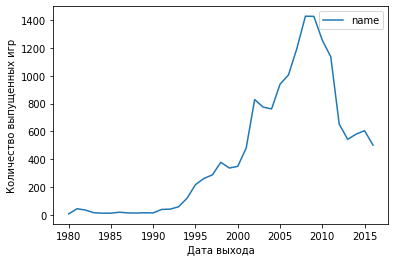

In [9]:
data.pivot_table(index='year_of_release',values = 'name',aggfunc='count').plot(ylabel='Количество выпущенных игр',xlabel='Дата выхода');


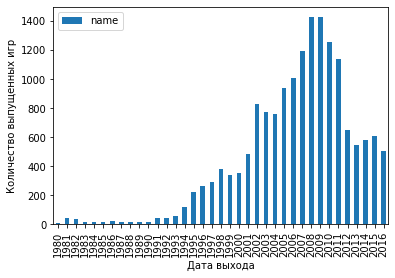

In [10]:
data.pivot_table(index='year_of_release',values = 'name',aggfunc='count').plot(kind='bar',ylabel='Количество выпущенных игр',xlabel='Дата выхода');

Заметный рост выпуска игр наблюдается с 1994 года, пик в 2008-9 годах а затем заметен спад.Можно рассмотреть данные в период с 1994 года.

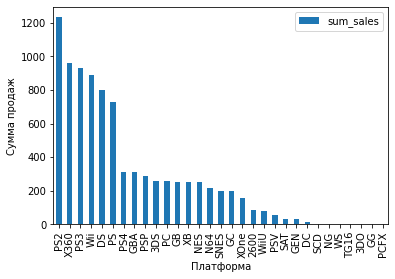

In [12]:
data.pivot_table(index='platform',values='sum_sales',aggfunc='sum').sort_values(by='sum_sales',ascending=False).plot(kind='bar',ylabel='Сумма продаж',xlabel='Платформа');


    График показывает количество проданных игр на каждой из платформ. Первые 10 из них мы возьмем для дальнейшего анализа.

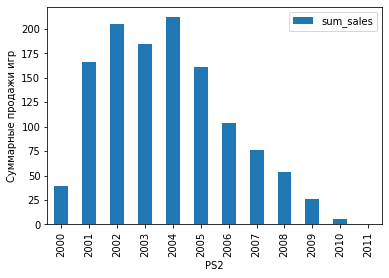

In [13]:
data.query('platform =="PS2"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='PS2');

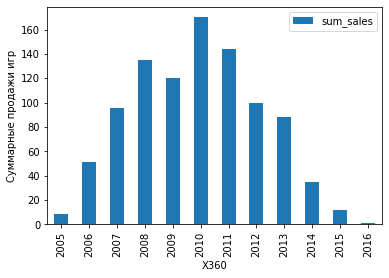

In [14]:
data.query('platform =="X360"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='X360');

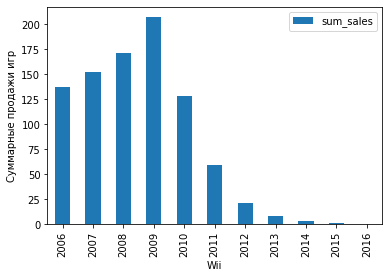

In [15]:
data.query('platform =="Wii"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='Wii');

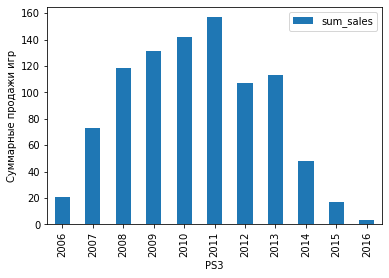

In [16]:
data.query('platform =="PS3"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='PS3');

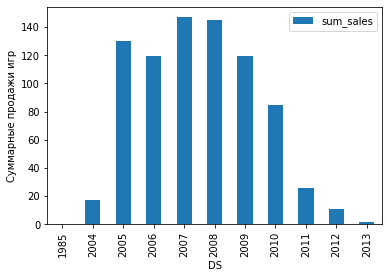

In [17]:
data.query('platform =="DS"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='DS');

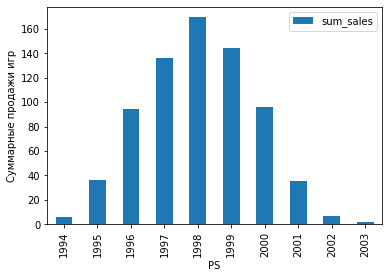

In [18]:
data.query('platform =="PS"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='PS');

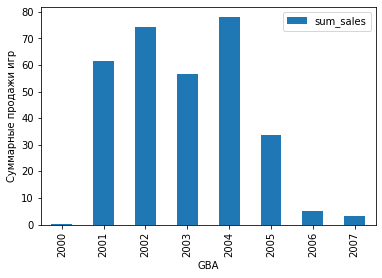

In [19]:
data.query('platform =="GBA"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='GBA');

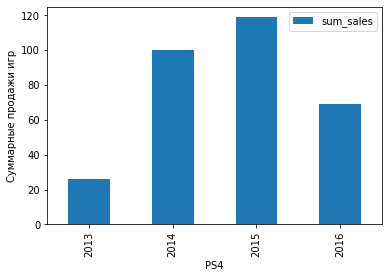

In [20]:
data.query('platform =="PS4"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='PS4');

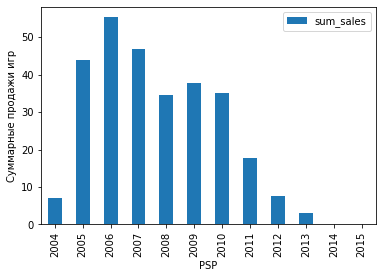

In [21]:
data.query('platform =="PSP"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='PSP');

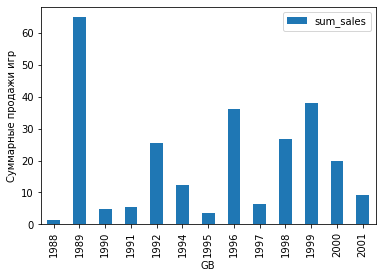

In [22]:
data.query('platform =="GB"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Суммарные продажи игр',xlabel='GB');

GB появилась в 1988 исчезла в 2001, пик в 2000.\
PSP появилась в 2004 исчезла в 2015,пик в 2006,2010 годах.\
PS4 поиявился в 2013.\
GBA появилась в 2000,исчезла в 2007,пик в 2002.\
PS появиласьв 1994 исчезла в 2003,пик в 1998.\
DS появилась в 1985,была  популярна с 2004 до 2013,когда и исчезла.\
PS3 появилась в 2006,пик в 2011,исчезла в 2016.\
WII появилась в 2006,пик в 2009,исчезла в 2016.\
X360 появиласьв 2005,пик - 2011,исчезла в 2016.\
PS2 появилась в 2000, пик 2002, исчезла в в 2011\

Заметим, что в среднем каждая платформа популярна 5 лет. За это время появляется новая и становится популярней.Таким образом, актуальный период - 5 лет. Возьмем данные начиная с 2011 года.


Рассмотрим период с 2014 по 2016 годы.</div>
    

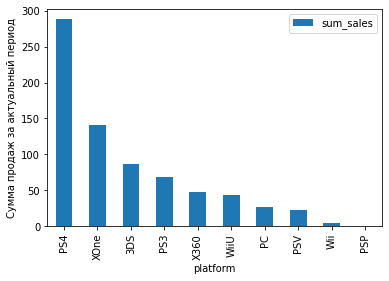

In [23]:
data = data.query('year_of_release > 2013')
data.pivot_table(index='platform',values='sum_sales',aggfunc='sum').sort_values(by='sum_sales',ascending=False).plot(kind='bar',ylabel='Сумма продаж за актуальный период');


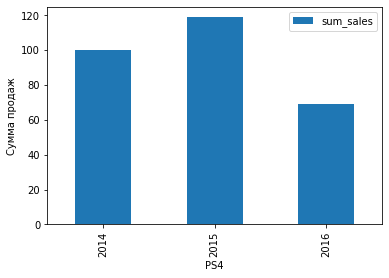

In [24]:
data.query('platform =="PS4"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='PS4');

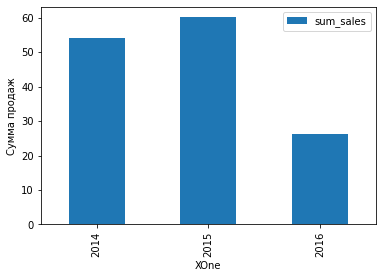

In [25]:
data.query('platform =="XOne"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='XOne');

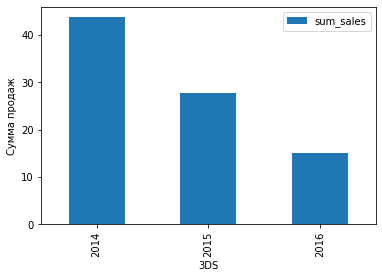

In [26]:
data.query('platform =="3DS"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='3DS');

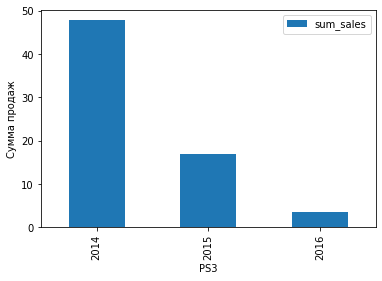

In [27]:
data.query('platform =="PS3"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='PS3');

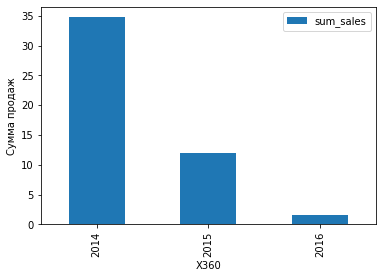

In [28]:
data.query('platform =="X360"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='X360');

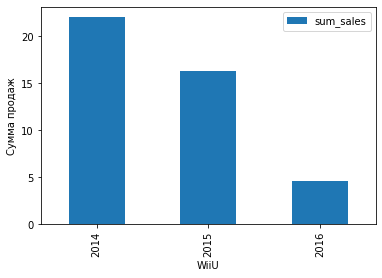

In [29]:
data.query('platform =="WiiU"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='WiiU');

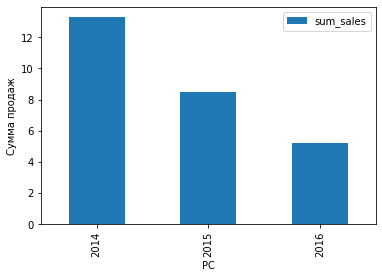

In [30]:
data.query('platform =="PC"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='PC');

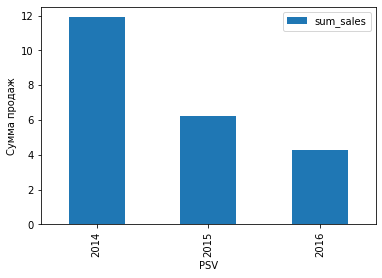

In [31]:
data.query('platform =="PSV"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='PSV');

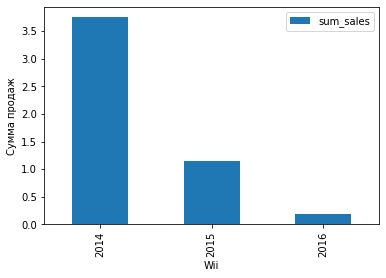

In [32]:
data.query('platform =="Wii"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='Wii');

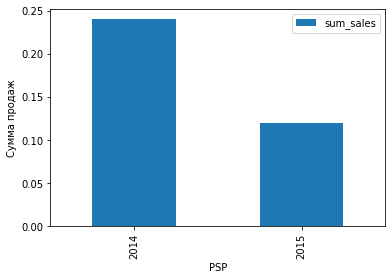

In [33]:
data.query('platform =="PSP"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').plot(kind='bar',ylabel='Сумма продаж',xlabel='PSP');

Заметим, что к 2016 году многие платформы потеряли свою популярность.PS4 продала 60 млн,XOne  20 млн,PC 5 млн,PCV 4 млн,Wiiu 5 млн



Лидируют по продажам PS4,XOne с разницой в 150 млн, и 3DS. На платформах PS4  , Xone и  3DS,за 2016 продали в 2 раза меньше чем в  2016.\
А на Других платформах PS3,X360 Wiiu , Wii  за год уменьшилась в 4-5 раз. На них продажи резко упали.
</div>
    

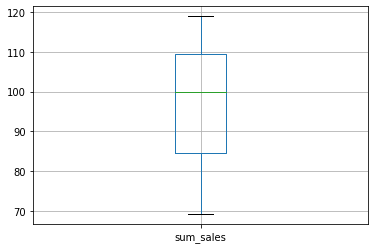

In [34]:
data.query('platform =="PS4"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').boxplot();

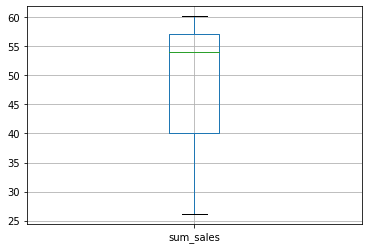

In [35]:
data.query('platform =="XOne"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').boxplot();

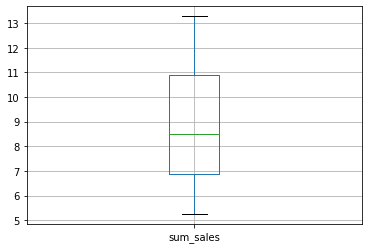

In [36]:
data.query('platform =="PC"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').boxplot();

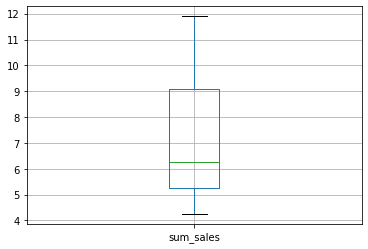

In [37]:
data.query('platform =="PSV"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').boxplot();

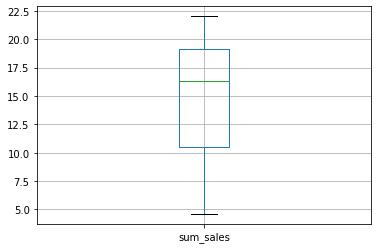

In [38]:
data.query('platform =="WiiU"').pivot_table(index='year_of_release',values='sum_sales',aggfunc='sum').boxplot();

Самые популярные это PS4,XOne,PC, их среднее и медианное значения больше остальных.

        Shooter  Action  Role-Playing  Sports  Fighting  Racing    Misc  \
count    128.00  619.00        221.00  161.00     60.00   69.00  113.00   
unique   104.00  153.00         90.00   95.00     45.00   39.00   55.00   
top        0.02    0.02          0.03    0.01      0.03    0.03    0.02   
freq       8.00   71.00         25.00   12.00      5.00    9.00   13.00   

        Platform  Simulation  Adventure  Puzzle  Strategy  
count      38.00       44.00     185.00   14.00     37.00  
unique     31.00       29.00      38.00   10.00     19.00  
top         0.01        0.01       0.02    0.01      0.01  
freq        3.00        8.00      41.00    3.00      5.00  


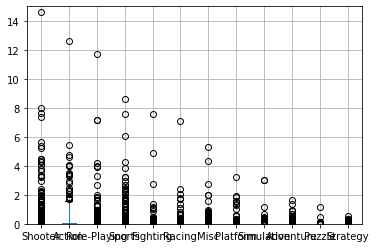

In [39]:
k = pd.DataFrame(columns = data['genre'].unique(),data = data['sum_sales'])
for i in data['genre'].unique():
    for j in data['genre'].index:
           if data.loc[j,'genre'] == i:
                k.loc[j,i] = data.loc[j,'sum_sales']

print(k.describe())
k = k.fillna(-1)
k.boxplot()
plt.ylim(0, 15)
plt.show()

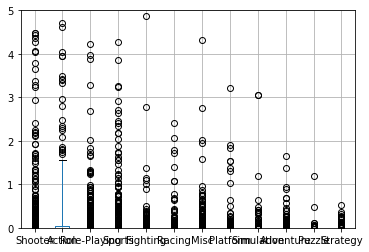

In [40]:
k.boxplot()
plt.ylim(0, 5)
plt.show()

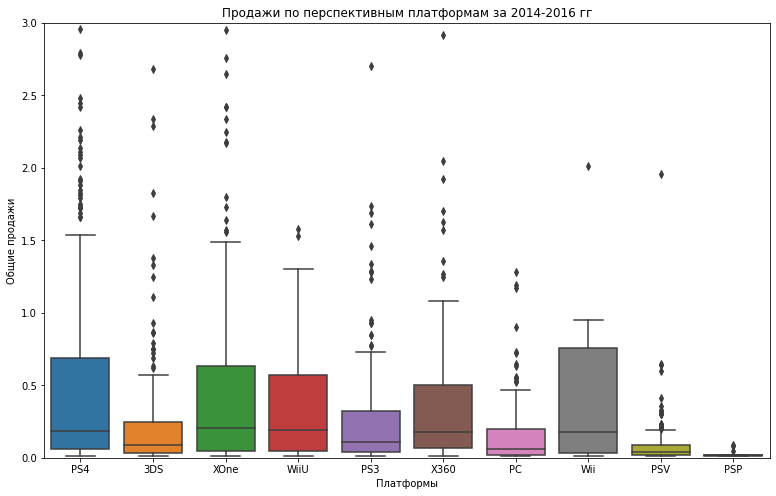

In [41]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'sum_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))
plt.show()

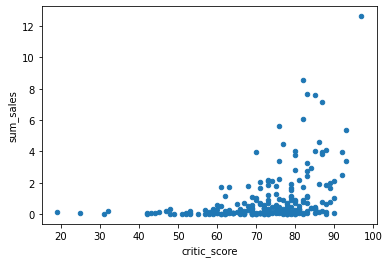

In [42]:
data_cor = data.query('critic_score > -5')
data_cor.query('platform == "PS4"').plot(kind='scatter',x='critic_score',y='sum_sales');

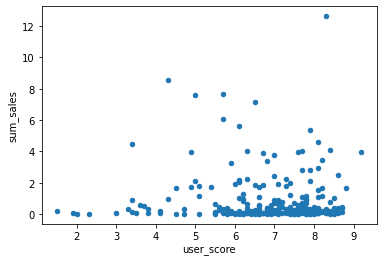

In [43]:
data_cor = data.query('user_score > -5')
data_cor.query('platform == "PS4"').plot(kind='scatter',x='user_score',y='sum_sales');

In [72]:
print(data.query('platform == "PS4" and critic_score > -5')['critic_score'].corr(data.query('platform == "PS4"')['sum_sales']))
print(data.query('platform == "PS4" and user_score > -5')['user_score'].corr(data.query('platform == "PS4"')['sum_sales']))

0.40266141068104083
-0.040131589472697356


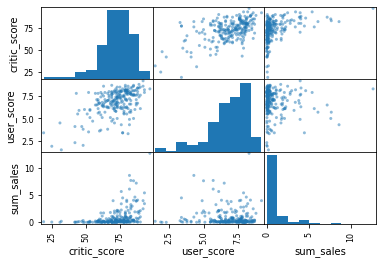

In [45]:
pd.plotting.scatter_matrix(data.query('platform == "PS4" and (critic_score>-5) and user_score >-5')[['critic_score','user_score','sum_sales']]);

Чем ввыше оценки ,тем больше продаж.

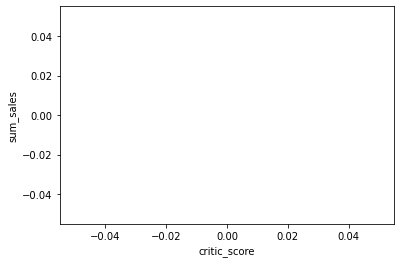

In [46]:
data.query('platform == "XOne and critic_score > -5"').plot(kind='scatter',x='critic_score',y='sum_sales');

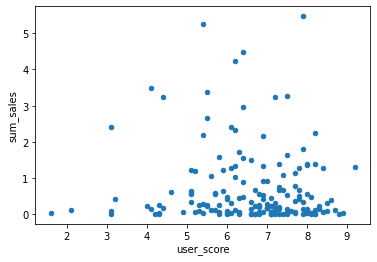

In [47]:
data.query('platform == "XOne" and user_score > -5').plot(kind='scatter',x='user_score',y='sum_sales');

In [73]:
print(data.query('platform == "XOne and critic_score > -5"')['critic_score'].corr(data.query('platform == "XOne"')['sum_sales']))
print(data.query('platform == "XOne" and user_score > -5')['user_score'].corr(data.query('platform == "XOne"')['sum_sales']))

nan
-0.0703839280647581


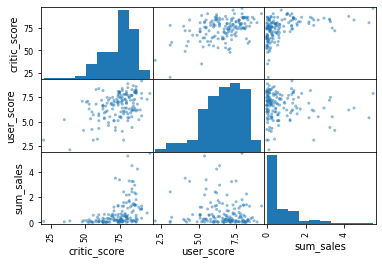

In [49]:
pd.plotting.scatter_matrix(data.query('platform == "XOne" and critic_score > -5 and user_score > -5')[['critic_score','user_score','sum_sales']]);

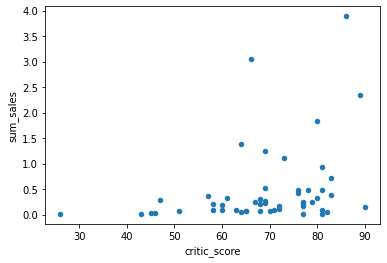

In [50]:
data.query('platform == "3DS" and critic_score > -5').plot(kind='scatter',x='critic_score',y='sum_sales');

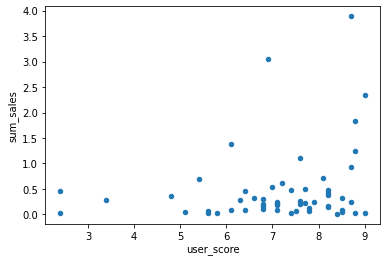

In [51]:
data.query('platform == "3DS" and user_score > -5').plot(kind='scatter',x='user_score',y='sum_sales');

In [68]:
print(data.query('platform == "3DS" and critic_score > -5')['critic_score'].corr(data.query('platform == "3DS" and critic_score > -5')['sum_sales']))
print(data.query('platform == "3DS" and user_score > -5')['user_score'].corr(data.query('platform == "3DS" and user_score > -5')['sum_sales']))

0.314117492869051
0.2151932718527028


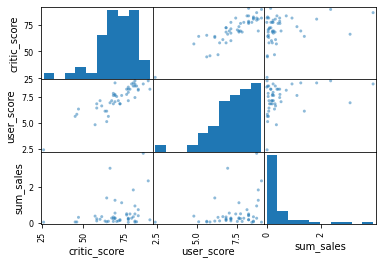

In [53]:
pd.plotting.scatter_matrix(data.query('platform == "3DS" and critic_score > -5 and user_score > -5')[['critic_score','user_score','sum_sales']]);

Чем ввыше оценки ,тем больше продаж.

In [86]:
data_cor = pd.DataFrame(columns = ['critic_score','user_score'])
for i in ['PS4','3DS','XOne']:
    data_cor.loc[i,'critic_score'] = data.query('user_score > -5 and critic_score > -5 and platform == @i')['critic_score'].corr(data.query('user_score > -5 and critic_score > -5 and platform == @i')['sum_sales'])
    data_cor.loc[i,'user_score'] = data.query('user_score > -5 and critic_score > -5 and platform == @i')['user_score'].corr(data.query('user_score > -5 and critic_score > -5 and platform == @i')['sum_sales'])
data_cor

,critic_score,user_score
PS4,0.401903,-0.043186
3DS,0.284686,0.27985
XOne,0.422112,-0.091734


In [74]:
data.query('critic_score > -5 and user_score > -5').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.129273,-0.083243,-0.093916,-0.090065,0.065150,0.013862,-0.119035
na_sales,-0.129273,1.000000,0.664557,0.248403,0.811223,0.330498,-0.000749,0.885560
eu_sales,-0.083243,0.664557,1.000000,0.215769,0.919598,0.268624,-0.034994,0.922617
jp_sales,-0.093916,0.248403,0.215769,1.000000,0.201978,0.128222,0.191007,0.365624
other_sales,-0.090065,0.811223,0.919598,0.201978,1.000000,0.287381,-0.013419,0.953329
critic_score,0.065150,0.330498,0.268624,0.128222,0.287381,1.000000,0.504460,0.325363
user_score,0.013862,-0.000749,-0.034994,0.191007,-0.013419,0.504460,1.000000,0.005202
sum_sales,-0.119035,0.885560,0.922617,0.365624,0.953329,0.325363,0.005202,1.000000




Для пользователей PS4 коэффицент корреляции: между отзывами критиков и продажами умеренная(0.4) и между отзывами пользователей и продажами слабая.\
Для пользователей 3DS коэффицент корелляции: между отзывами критиков и продажами слабая(0.28) и между отзывами пользователей и продажами слабая 0.27\
Для пользователей XOne коэффицент корреляции: между отзывами критиков и продажами умеренная(0.42) и между отзывами пользователей и продажами слабая.</div>

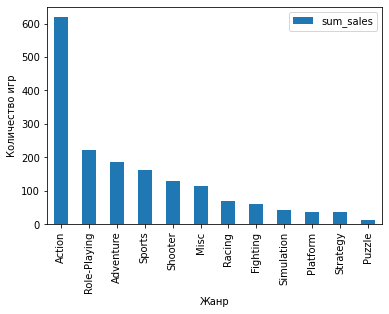

In [54]:
data.pivot_table(index='genre',values='sum_sales',aggfunc='count').sort_values(by='sum_sales',ascending=False).plot(kind='bar',xlabel='Жанр',ylabel='Количество игр');

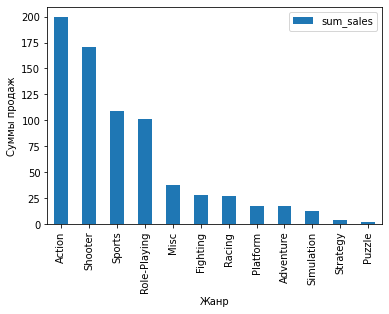

In [55]:
data.pivot_table(index='genre',values='sum_sales',aggfunc='sum').sort_values(by='sum_sales',ascending=False).plot(kind='bar',xlabel='Жанр',ylabel='Суммы продаж');

Самые прибылбные жанры: action,shooter,role-playing,sports,misc.\
Выделяются жанры с высокими продажами : action,shooter,role-playing.Жанры с маленькими продажами :puzzle,strategy,adventure.


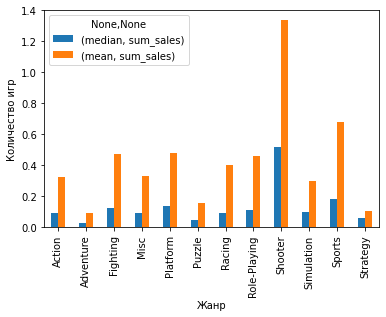

In [56]:
data.pivot_table(index='genre',values='sum_sales',aggfunc=['median','mean']).plot(kind='bar',xlabel='Жанр',ylabel='Количество игр');

#  Составим портрет пользователя каждого региона

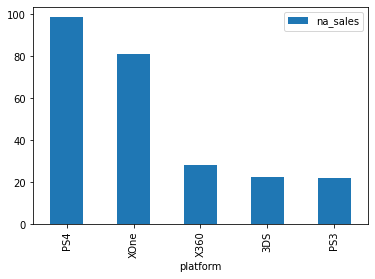

In [57]:
data.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5].plot(kind='bar');

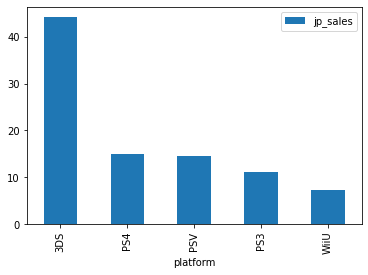

In [58]:
data.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].plot(kind='bar');

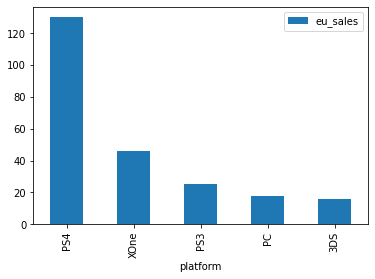

In [59]:
data.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5].plot(kind='bar');

X360 в Америке продали свыше 200 млн игр,в Японии даже не вошли в топ 5,в Европе 120 млн копий.\
PS3 в Америке продали свыше 150 млн,в Японии около 50, а в Европе свыше 160.\
PS4 в Америке продали около 100 млн, в Японии около 20,в Европе около 140.\
3DS В Америке продали около 100 млн, в Японии 100 млн,а в Европе около 60.\

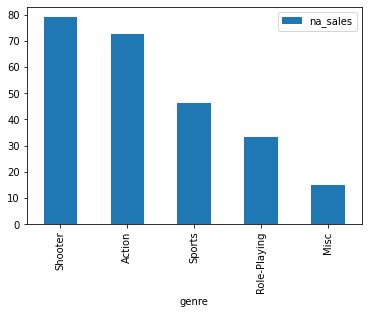

In [60]:
data.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5].plot(kind='bar');

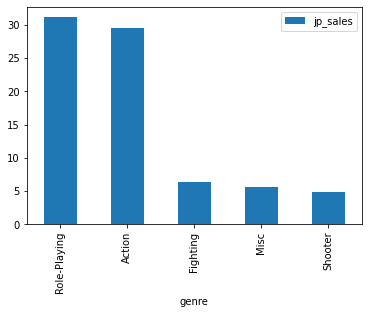

In [61]:
data.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].plot(kind='bar');

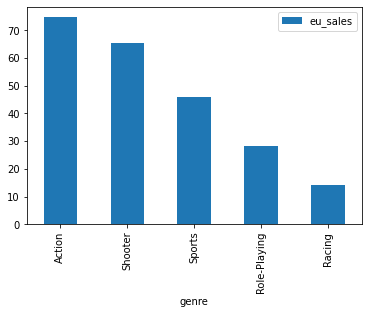

In [62]:
data.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5].plot(kind='bar');

В Америке и Европе популярны action, shooter,sports,role-playing жанры.Отличаются лишь позиции под номером 5 в Америке это Misc а в Европе- это racing.По-моему мнению, схожесть в предпочтениях обусловлена тем,что американцы являются потомками европейцев.\
В Японии же этот список кардинально другой. Самые популярные это role-playing,action,misc,fighting.Я думаю, это связано с тем, что менталитет и культура этих стран сильно отличается.

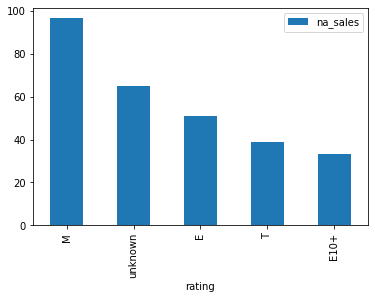

In [63]:
data.pivot_table(index='rating',values = 'na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='bar');

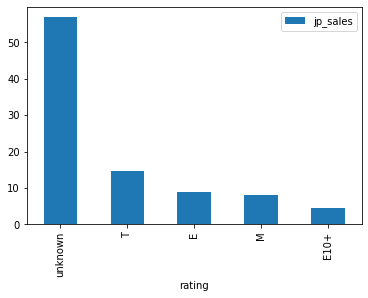

In [64]:
data.pivot_table(index='rating',values = 'jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).plot(kind='bar');

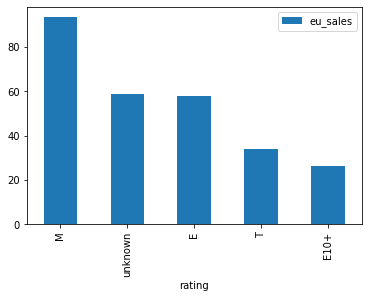

In [65]:
data.pivot_table(index='rating',values = 'eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).plot(kind='bar');

В Амеркие популярны :M,E,T+\

В Европе популярны: M,E,T


В Японии больше 80 млн пропусков а затем идут T,E,M.</div>

# Проверка Гипотез

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
H1: Среднийе пользовательские рейтинги платформ Xbox One и PC не равны.

In [66]:


xone = data.query('platform == "XOne" and user_score > -5')['user_score'].values
pc = data.query('platform == "PC" and user_score > -5')['user_score'].values
results = st.ttest_ind(xone,pc,equal_var = True)

alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковы\
H1: Средние пользовательские рейтинги жанров Action и Sports не равны.


In [67]:

action = data.query('genre == "Action" and user_score > -5')['user_score'].values
sport = data.query('genre == "Sports" and user_score > -5')['user_score'].values
    
results = st.ttest_ind(action,sport)

alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Значит, средние пользовательские рейтинги жанров Action и Sports не равны.

# Вывод

 В Америке успешными будут игры на платформах PS4,Xone,X360(c продажами 100,80,25 млн соответственно) в жанрах shooter,action и sports(80,70,45 млн копий соответственно), рейтингом M,E,T(100,50,40).\
 В Япониии будут успешными игры на платформах 3DS,PS4,PSV(45,15,15 млн соответственно), в жанрах role_playing,action,fighting(30,29,6) и рейтингом T,E,M(15,9,8).\
    В Европе будут успешными игры на платформах PS4,Xone,PS3(130,30,30 млн) в жанрах action,shooter,sports(75,65,45 млн) и рейтингом M,E,T(90,60,40)

При выстраивании стратегии нужно учесть отзывы,потому что они оказывают влияние на продажи.Отзывы критиков оказывает умеренное воздействие на продажи(0.32). А отзывы пользователей оказывают слабое воздействие на продажи.
    <div>